# AI CA5 Phase2
# Amirhossein Alizad 810197546


<strong> in this computer assignment we are going to use keras library as an interface for the tensor flow library. we are going to read train and test datas as images and training a network model on this data.</strong>

In [ ]:
from tensorflow.keras import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.metrics import classification_report

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def draw(x):
  plt.plot(x.history['accuracy'])
  plt.plot(x.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()
  
  plt.plot(x.history['loss'])
  plt.plot(x.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

  
def predict(model):
  dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255)
  predictTrain = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size = (80,80),
    color_mode = "grayscale",
    batch_size=32,
    shuffle = False)
  predictTest = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size = (80,80),
    color_mode = "grayscale",
    batch_size=32,
    shuffle = False)
  yTrain = model.predict(predictTrain)
  yTest = model.predict(predictTest)
  print("Train:")
  print(classification_report(np.argmax(np.array(yTrain), axis = 1), np.array(predictTrain.classes), target_names=['COVID19', 'NORMAL', 'PNEUMONIA']))
  print("Test:")
  print(classification_report(np.argmax(np.array(yTest), axis = 1), np.array(predictTest.classes), target_names=['COVID19', 'NORMAL', 'PNEUMONIA']))


<strong> these functions find the 'recall', 'precision' and 'f1' ... of every epoch for our training.<br>
as we know <br> 
$recall = truePositives / allPossiblePositives$.<br>
$precision = truePositives / predictedPositives$.<br>
$f1 = (precision*recall) / (precision+recall)$.
the draw function draws the plot for each model<br>
the predict function predicts the train and test data given the model.

# 1

In [ ]:
def dataDefine(status):
  if status == 0:
    dataGenerator = preprocessing.image.ImageDataGenerator()
  else:
    dataGenerator = preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
  dataTrain = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size = (80,80),
    color_mode = "grayscale",
    batch_size=32)
  dataTest = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size = (80,80),
    color_mode = "grayscale",
    batch_size=32)
  return dataTrain, dataTest


<strong> depending on the status input we will read the datas with a rescale of 1./255 or without any rescaling.</strong>

In [ ]:
dataTrain, dataTest = dataDefine(0)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


# 2

No handles with labels found to put in legend.


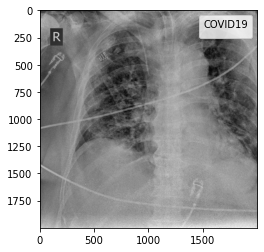

No handles with labels found to put in legend.


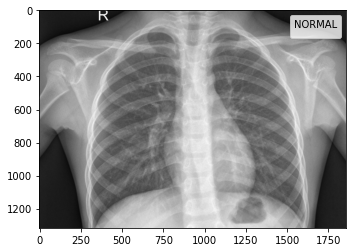

No handles with labels found to put in legend.


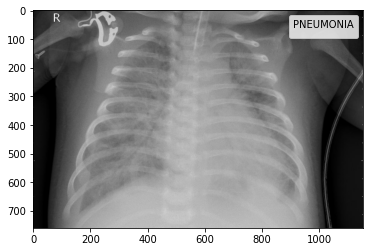

In [ ]:
img1 = plt.imread("/content/Data/train/COVID19/COVID19(0).jpg")
plt.imshow(img1, cmap='gray')
plt.legend(title = "COVID19")
plt.show()
img2 = plt.imread("/content/Data/train/NORMAL/NORMAL(0).jpg")
plt.imshow(img2)
plt.legend(title = "NORMAL")
plt.show()
img2 = plt.imread("/content/Data/train/PNEUMONIA/PNEUMONIA(0).jpg")
plt.imshow(img2)
plt.legend(title = "PNEUMONIA")
plt.show()

In [ ]:
print("train : " + str(dataTrain.n) + " images in a total of " + str(dataTrain.num_classes) + " classes.")
print("test : " + str(dataTest.n) + " images in a total of " + str(dataTest.num_classes) + " classes.")

train : 5144 images in a total of 3 classes.
test : 1288 images in a total of 3 classes.


<strong>the '.n' attribute gives the total number of data in a dataset and '.num_classes' gives us the total number of classes.</strong>

In [ ]:
new_dic = {"col" : {0 : "COVID19", 1 : "NORMAL", 2 : "PNEUMONIA"}}
unique, counts = np.unique(dataTrain.classes, return_counts=True)
dic = dict(zip(unique, counts))
for i in dic:
  print(new_dic['col'][i] + " : " + str(dic[i]))

COVID19 : 460
NORMAL : 1266
PNEUMONIA : 3418


<strong> here we can see the number of data in each class</strong>

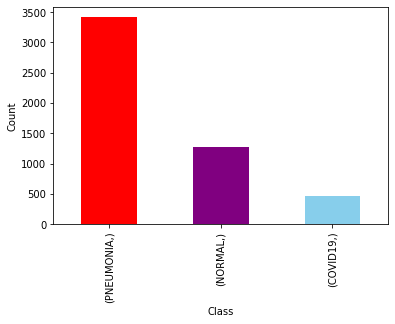

In [ ]:
df = pd.DataFrame(dataTrain.classes, columns=['col'])
df.replace(new_dic, inplace = True)
df.value_counts().plot(kind="bar", xlabel = "Class", ylabel = "Count", color = ["red", "purple", "skyblue"])

<strong> we labeld each column by its name and value_counts() gives us that there are $n_i$ datas in class $i$ which we will use the plot attribute to convert it into a bar plot</strong>

# 3

In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

<strong> we will use 2 hidden layers each with 1024 neurons and each with $relu$
as activation function.</stong>

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

<strong> using SGD as optimizer and categorical cross entropy as loss function.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


<strong> we will use .summary() to show each layers parameters.<br>
summary will show us:<br>
1-The layers and their order in the model.
2-The output shape of each layer.
3-The number of parameters (weights) in each layer.
4-The total number of parameters (weights) in the model.<br>
first we have flatten the input, so (80, 80) will become (1, 6400) which we will show as 6400, then we have 1024 neurons in the first layer. its just like we had 6400 neurons in the last layer and 1024 in this layer.also we will have a bias vector, which its size is equal to the number of the neurons in this layer. now we have $ 6400 * 1024 + 1024 = 6554624$ which is equal to the number of parameters of the first dense layer.<br>
just like before we have 1024 neurons in this layer and 1024 neurons in the last layer and also a bias sized 1024 which gives us $1024 * 1024 + 1024 = 1049600$ which is equal to the number of parameters in the second dense layer.<br> and at last we have 3 neurons ( the number of our classes ) in this layer and 1024 neurons in the last layer and a bias sized 3 which will give us $ 3 * 1024 + 3 = 3075 $ whichi is equal to the number of parameters in the last dense layer</strong>

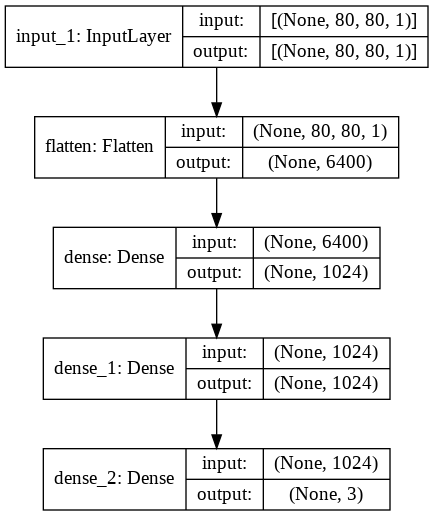

In [ ]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

# 4

# I.

## Activation: Relu

In [ ]:
 x = model.fit(dataTrain, validation_data = dataTest ,epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 904ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 145s 900ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 146s 910ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 144s 896ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 144s 893ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

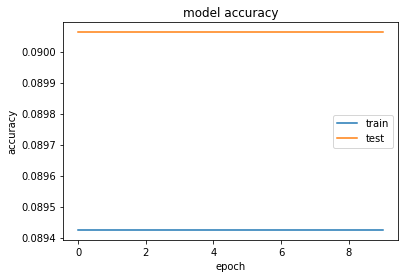

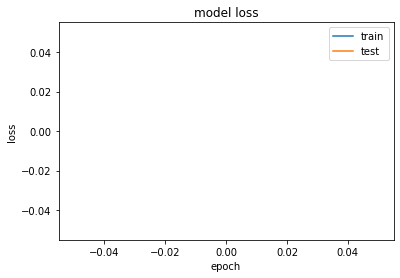

In [ ]:
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<strong> here we will get 'nan' value for our loss.<br>it is hard to work with neural networks because the outputs are unbounded, so we probably have the exploding gradient problem here.<br>
updates to the weights become so large that the weights overflow their numerical precision.here in the first few batches, the amount of loss increases greatly and then overflows which leads to no update in the weights<br>
there are several ways to solve this problem:<br>
1- normalizing the data<br>
2- adding regularizers<br>
3- reducing the size of our network ( harmful )<br>
4- increasing the batch size

# II.

## Activation: Tanh 

In [ ]:
dataTrain, dataTest = dataDefine(0)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="tanh")(out)
out = layers.Dense(1024, activation="tanh")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


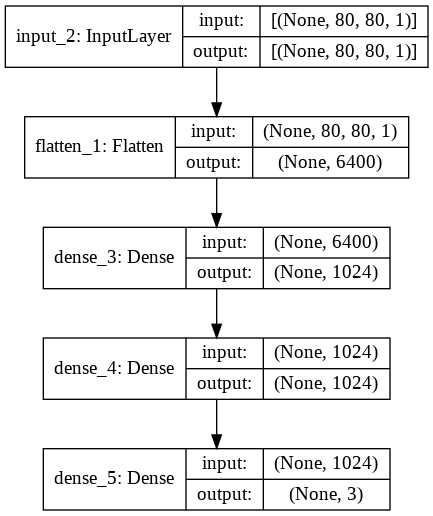

In [ ]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 147s 915ms/step - loss: 1.2640 - accuracy: 0.5474 - f1_m: 0.5015 - precision_m: 0.5108 - recall_m: 0.4999 - val_loss: 0.9760 - val_accuracy: 0.2461 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
161/161 [==============================] - 144s 895ms/step - loss: 0.9549 - accuracy: 0.6036 - f1_m: 0.5440 - precision_m: 0.5449 - recall_m: 0.5432 - val_loss: 0.8717 - val_accuracy: 0.6638 - val_f1_m: 0.6654 - val_precision_m: 0.6654 - val_recall_m: 0.6654
Epoch 3/10
161/161 [==============================] - 145s 899ms/step - loss: 0.9239 - accuracy: 0.6246 - f1_m: 0.5804 - precision_m: 0.5805 - recall_m: 0.5802 - val_loss: 0.9099 - val_accuracy: 0.6638 - val_f1_m: 0.6654 - val_precision_m: 0.6654 - val_recall_m: 0.6654
Epoch 4/10
161/161 [==============================] - 144s 894ms/step - loss: 0.9150 - accuracy: 0.6262 - f1_m: 0.5683 - precision_m: 0.5742 - recall_m: 0.5680 - val_loss: 0.8563

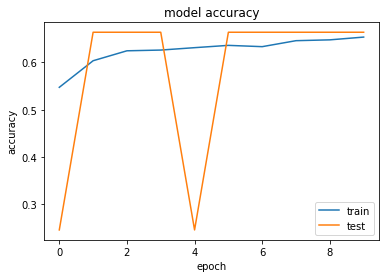

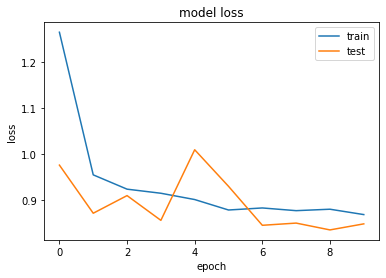

In [ ]:
draw(x)

<strong> when we use tanh as activation, the output is not unbounded, the output of tanh is bounded between 0 and 1, therefor, we will not have the exploding gradient problem. but there might be another problem for this function, vanishing gradient problem, causing the model to learn so slow or refuse to learn at all,and the accuracy is still low. the solution to that is to normalize the data.</strong>

#III.

<strong> the differences are caused by the difference of the activation functions, the relu function causes exploding gradient problem because the output reaches infinity, tanh avoids that. (because the range of output differs in each model)<br>
the similarity is that both of the models have low accuracy and are far from the desired accuracy. we will normalize the data to avoid that problem.</strong>

# 5

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 147s 913ms/step - loss: 0.6950 - accuracy: 0.6997 - f1_m: 0.6917 - precision_m: 0.7273 - recall_m: 0.6699 - val_loss: 0.3389 - val_accuracy: 0.8929 - val_f1_m: 0.8944 - val_precision_m: 0.9120 - val_recall_m: 0.8780
Epoch 2/10
161/161 [==============================] - 145s 898ms/step - loss: 0.3884 - accuracy: 0.8426 - f1_m: 0.8429 - precision_m: 0.8531 - recall_m: 0.8335 - val_loss: 0.2453 - val_accuracy: 0.9099 - val_f1_m: 0.9085 - val_precision_m: 0.9157 - val_recall_m: 0.9017
Epoch 3/10
161/161 [==============================] - 144s 895ms/step - loss: 0.3290 - accuracy: 0.8700 - f1_m: 0.8679 - precision_m: 0.8751 - recall_m: 0.8610 - val_loss: 0.2288 - val_accuracy: 0.9115 - val_f1_m: 0.9126 - val_precision_m: 0.9161 - val_recall_m: 0.9093
Epoch 4/10
161/161 [==============================] - 150s 933ms/step - loss: 0.3144 - accuracy: 0.8754 - f1_m: 0.8736 - precision_m: 0.8782 - recall_m: 0.8693 - val_loss: 0.2134 - val_accur

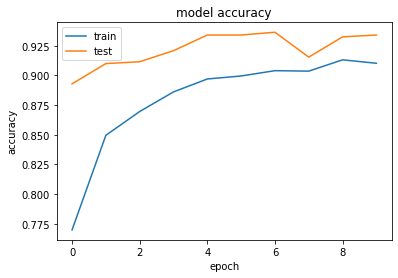

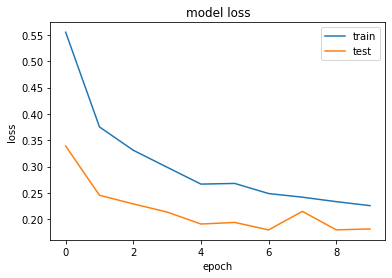

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.81      0.97      0.88       386
      NORMAL       0.91      0.85      0.88      1368
   PNEUMONIA       0.95      0.96      0.95      3390

    accuracy                           0.93      5144
   macro avg       0.89      0.92      0.90      5144
weighted avg       0.93      0.93      0.93      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.78      1.00      0.88        91
      NORMAL       0.92      0.85      0.89       344
   PNEUMONIA       0.96      0.96      0.96       853

    accuracy                           0.93      1288
   macro avg       0.89      0.94      0.91      1288
weighted avg       0.94      0.93      0.93      1288



<strong> the best model we could have had is like this model, 2 layers, each of them having 1024 neurons with relu as activation function. we will work with this model in the upcoming parts.</strong>

# 6

# I.

<strong>When looking at noisy time series data such as your training/validation error graphs in tensorboard, you may often notice that the raw values are often quite noisy. Quite often, you are able to see a trend in the graph. These trends often become more obvious when you add some smoothing to the raw graph values.<br>
exponential smoothing formula:<br>
$S_0=X_0;$<br>
$S_t=\alpha X_t+(1-\alpha)S_m; m > 1;1 \geq \alpha \geq 0;$<br>
$m = t-1;$</strong>

<strong>in the above equation, momentum specifies the amount of smoothing we want. A typical value for momentum is .9. From this equation, we can see that the value at time step t takes into account previous values from time steps (t — 1) and before. The weighting of previous time steps drops off exponentially so the most recent time step has the greatest impact</strong>

#II.

# $momentum = 0.5$

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.5), loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)  

Epoch 1/10
161/161 [==============================] - 148s 918ms/step - loss: 0.6530 - accuracy: 0.7410 - f1_m: 0.7074 - precision_m: 0.7547 - recall_m: 0.6844 - val_loss: 0.3315 - val_accuracy: 0.8781 - val_f1_m: 0.8766 - val_precision_m: 0.8839 - val_recall_m: 0.8697
Epoch 2/10
161/161 [==============================] - 147s 915ms/step - loss: 0.3621 - accuracy: 0.8506 - f1_m: 0.8514 - precision_m: 0.8572 - recall_m: 0.8458 - val_loss: 0.2224 - val_accuracy: 0.9169 - val_f1_m: 0.9171 - val_precision_m: 0.9196 - val_recall_m: 0.9146
Epoch 3/10
161/161 [==============================] - 147s 914ms/step - loss: 0.2795 - accuracy: 0.8925 - f1_m: 0.8915 - precision_m: 0.8962 - recall_m: 0.8870 - val_loss: 0.2443 - val_accuracy: 0.9068 - val_f1_m: 0.9097 - val_precision_m: 0.9132 - val_recall_m: 0.9062
Epoch 4/10
161/161 [==============================] - 146s 910ms/step - loss: 0.2813 - accuracy: 0.8952 - f1_m: 0.8950 - precision_m: 0.8975 - recall_m: 0.8925 - val_loss: 0.1932 - val_accur

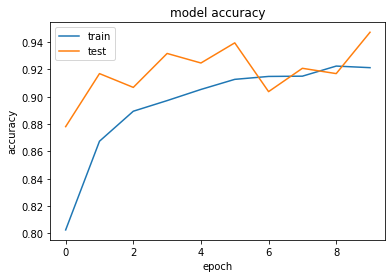

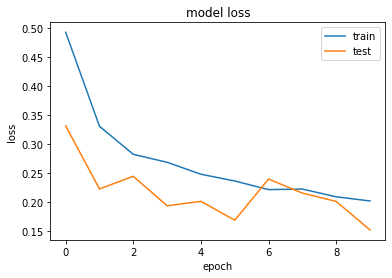

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.90      0.95      0.92       433
      NORMAL       0.91      0.88      0.90      1300
   PNEUMONIA       0.96      0.96      0.96      3411

    accuracy                           0.94      5144
   macro avg       0.92      0.93      0.93      5144
weighted avg       0.94      0.94      0.94      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.91      0.95      0.93       111
      NORMAL       0.94      0.89      0.91       335
   PNEUMONIA       0.96      0.97      0.96       842

    accuracy                           0.95      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.95      0.95      0.95      1288



<strong> as is shown above, our accuracy for both test and train data has slightly improved.</strong>

# $momentum=0.9$

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.9), loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 147s 912ms/step - loss: 0.6905 - accuracy: 0.7275 - f1_m: 0.6989 - precision_m: 0.7247 - recall_m: 0.6841 - val_loss: 0.2923 - val_accuracy: 0.8975 - val_f1_m: 0.9024 - val_precision_m: 0.9170 - val_recall_m: 0.8887
Epoch 2/10
161/161 [==============================] - 156s 961ms/step - loss: 0.3599 - accuracy: 0.8779 - f1_m: 0.8767 - precision_m: 0.8834 - recall_m: 0.8704 - val_loss: 0.2918 - val_accuracy: 0.8851 - val_f1_m: 0.8826 - val_precision_m: 0.8914 - val_recall_m: 0.8742
Epoch 3/10
161/161 [==============================] - 161s 1s/step - loss: 0.2867 - accuracy: 0.8883 - f1_m: 0.8893 - precision_m: 0.8929 - recall_m: 0.8859 - val_loss: 0.1995 - val_accuracy: 0.9286 - val_f1_m: 0.9292 - val_precision_m: 0.9319 - val_recall_m: 0.9268
Epoch 4/10
161/161 [==============================] - 163s 1s/step - loss: 0.2511 - accuracy: 0.9127 - f1_m: 0.9130 - precision_m: 0.9170 - recall_m: 0.9092 - val_loss: 0.2133 - val_accuracy: 0

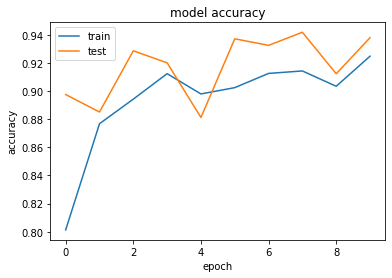

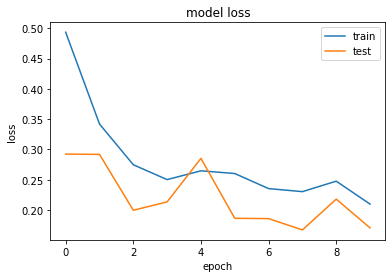

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.93      0.88      0.90       485
      NORMAL       0.77      0.96      0.85      1014
   PNEUMONIA       0.98      0.92      0.95      3645

    accuracy                           0.92      5144
   macro avg       0.89      0.92      0.90      5144
weighted avg       0.93      0.92      0.93      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.95      0.92      0.93       120
      NORMAL       0.82      0.96      0.89       272
   PNEUMONIA       0.98      0.93      0.96       896

    accuracy                           0.94      1288
   macro avg       0.92      0.94      0.92      1288
weighted avg       0.94      0.94      0.94      1288



<strong> the result has improved even more than the last results and accuracy for test and train data is at 94 and 92 percent</strong>

#$momentum=0.99$

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.99), loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 167s 1s/step - loss: 0.6813 - accuracy: 0.7421 - f1_m: 0.7339 - precision_m: 0.7527 - recall_m: 0.7232 - val_loss: 0.2271 - val_accuracy: 0.9216 - val_f1_m: 0.9217 - val_precision_m: 0.9267 - val_recall_m: 0.9169
Epoch 2/10
161/161 [==============================] - 163s 1s/step - loss: 0.3955 - accuracy: 0.8675 - f1_m: 0.8681 - precision_m: 0.8750 - recall_m: 0.8616 - val_loss: 0.5520 - val_accuracy: 0.8680 - val_f1_m: 0.8444 - val_precision_m: 0.8764 - val_recall_m: 0.8155
Epoch 3/10
161/161 [==============================] - 160s 994ms/step - loss: 0.6290 - accuracy: 0.7911 - f1_m: 0.7911 - precision_m: 0.7976 - recall_m: 0.7854 - val_loss: 0.7798 - val_accuracy: 0.7290 - val_f1_m: 0.1168 - val_precision_m: 0.7919 - val_recall_m: 0.0640
Epoch 4/10
161/161 [==============================] - 154s 955ms/step - loss: 0.8488 - accuracy: 0.6713 - f1_m: 0.5952 - precision_m: 0.7258 - recall_m: 0.5827 - val_loss: 0.6307 - val_accuracy: 0

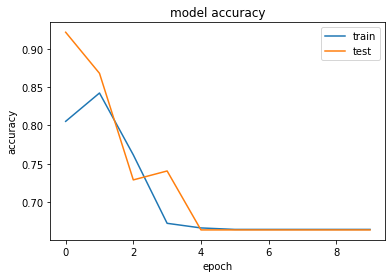

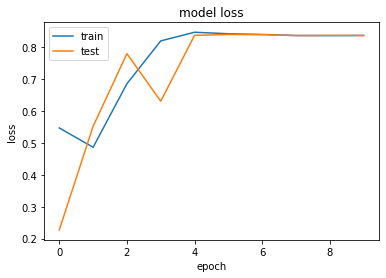

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00         0
      NORMAL       0.00      0.00      0.00         0
   PNEUMONIA       1.00      0.66      0.80      5144

    accuracy                           0.66      5144
   macro avg       0.33      0.22      0.27      5144
weighted avg       1.00      0.66      0.80      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00         0
      NORMAL       0.00      0.00      0.00         0
   PNEUMONIA       1.00      0.66      0.80      1288

    accuracy                           0.66      1288
   macro avg       0.33      0.22      0.27      1288
weighted avg       1.00      0.66      0.80      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<strong> but with a higher momentum we get a bad result as it predicts every thing to be in PNEUMONIA class.</strong>

#III.

<strong> as shown here the result with the 0.99 momentum is not as good as other models, so it does not always work best with higher momentums. with a higher momentum the predictions become more stable but with this momentum the model became stable for class PNEUMONIA and predicted all the data in the said class.<br>
We tried three modes for momentum. As the momentum increases, the speed of our movement towards the answer increases in such a way that it becomes difficult to reach it. It is better to move slower as we get closer to the answer.<br>
with a higher momentum, the model almost becomes random and the changing of the weights becomes more and more in each propagation</strong>

#IV.

<strong>Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data and more efficiently.<br>
adam has so many effective features:<br>
* Straightforward to implement
* Computationally efficient
* Little memory requirements
* Appropriate for problems with very noisy and/or sparse gradients
* ...</strong>

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 906ms/step - loss: 1.7345 - accuracy: 0.6737 - f1_m: 0.6661 - precision_m: 0.6734 - recall_m: 0.6600 - val_loss: 0.3231 - val_accuracy: 0.8804 - val_f1_m: 0.8795 - val_precision_m: 0.8833 - val_recall_m: 0.8758
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: 0.3298 - accuracy: 0.8774 - f1_m: 0.8778 - precision_m: 0.8829 - recall_m: 0.8730 - val_loss: 0.3302 - val_accuracy: 0.8556 - val_f1_m: 0.8560 - val_precision_m: 0.8600 - val_recall_m: 0.8521
Epoch 3/10
161/161 [==============================] - 146s 908ms/step - loss: 0.3069 - accuracy: 0.8801 - f1_m: 0.8791 - precision_m: 0.8850 - recall_m: 0.8733 - val_loss: 0.2355 - val_accuracy: 0.9076 - val_f1_m: 0.9021 - val_precision_m: 0.9064 - val_recall_m: 0.8979
Epoch 4/10
161/161 [==============================] - 144s 896ms/step - loss: 0.2733 - accuracy: 0.8983 - f1_m: 0.8977 - precision_m: 0.9019 - recall_m: 0.8936 - val_loss: 0.3819 - val_accur

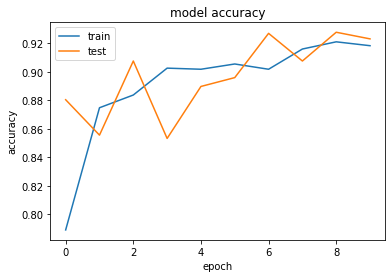

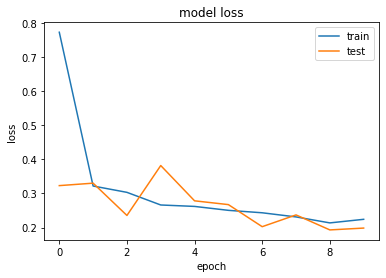

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.82      0.97      0.89       386
      NORMAL       0.95      0.79      0.86      1512
   PNEUMONIA       0.92      0.96      0.94      3246

    accuracy                           0.91      5144
   macro avg       0.89      0.91      0.90      5144
weighted avg       0.92      0.91      0.91      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.78      0.99      0.87        91
      NORMAL       0.96      0.81      0.87       376
   PNEUMONIA       0.93      0.97      0.95       821

    accuracy                           0.92      1288
   macro avg       0.89      0.92      0.90      1288
weighted avg       0.93      0.92      0.92      1288



<strong> the result for both test and train data has improved.

# 7

#I.

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 145s 897ms/step - loss: 1.6367 - accuracy: 0.6918 - f1_m: 0.6850 - precision_m: 0.6928 - recall_m: 0.6787 - val_loss: 0.2129 - val_accuracy: 0.9231 - val_f1_m: 0.9256 - val_precision_m: 0.9307 - val_recall_m: 0.9207
Epoch 2/20
161/161 [==============================] - 143s 891ms/step - loss: 0.3188 - accuracy: 0.8782 - f1_m: 0.8779 - precision_m: 0.8816 - recall_m: 0.8744 - val_loss: 0.2276 - val_accuracy: 0.9224 - val_f1_m: 0.9242 - val_precision_m: 0.9285 - val_recall_m: 0.9200
Epoch 3/20
161/161 [==============================] - 143s 891ms/step - loss: 0.2615 - accuracy: 0.9007 - f1_m: 0.8998 - precision_m: 0.9041 - recall_m: 0.8957 - val_loss: 0.2465 - val_accuracy: 0.8998 - val_f1_m: 0.9036 - val_precision_m: 0.9103 - val_recall_m: 0.8971
Epoch 4/20
161/161 [==============================] - 143s 890ms/step - loss: 0.2795 - accuracy: 0.8914 - f1_m: 0.8902 - precision_m: 0.8937 - recall_m: 0.8868 - val_loss: 0.2427 - val_accur

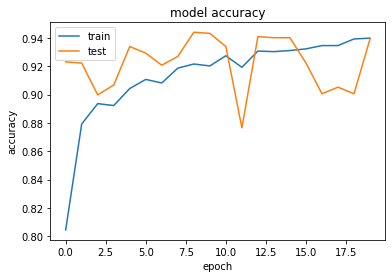

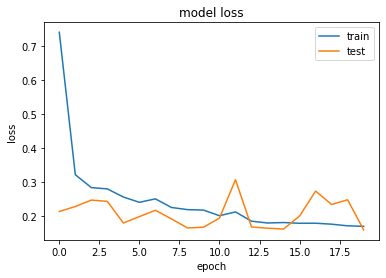

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.95      0.96      0.95       455
      NORMAL       0.95      0.89      0.92      1352
   PNEUMONIA       0.95      0.98      0.97      3337

    accuracy                           0.95      5144
   macro avg       0.95      0.94      0.94      5144
weighted avg       0.95      0.95      0.95      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.88      0.92      0.90       111
      NORMAL       0.95      0.86      0.91       350
   PNEUMONIA       0.94      0.97      0.96       827

    accuracy                           0.94      1288
   macro avg       0.92      0.92      0.92      1288
weighted avg       0.94      0.94      0.94      1288



#II.

<strong>if we want to get the best result that we can, we may need to update the weights. but also in some prooblems we may get the best training in the first pass and may not need more than 1 epoch. so in some problems we may not need more than 1 epoch but usually it takes more than 1 to get the best trained model</strong>

#III.

<strong> no, training the model more than it is needed may lead to overfitting which is learning the training data so good that it can't learn anymore and it also wont do good on the data that it hasn't seen. otherwise training the model less than it is needed which is not having time to be trained well on the train data so it won't perform well on either train or test data. the solution to that is called <u>early stopping</u> which is stopping at a low epoch so it wont be over fitted and not so low that it will be underfitted</strong>

# 8

#I.

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam', loss="MSE", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 161s 997ms/step - loss: 0.2183 - accuracy: 0.6686 - f1_m: 0.6594 - precision_m: 0.6702 - recall_m: 0.6556 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6654 - val_precision_m: 0.6654 - val_recall_m: 0.6654
Epoch 2/20
161/161 [==============================] - 161s 1s/step - loss: 0.2232 - accuracy: 0.6651 - f1_m: 0.6652 - precision_m: 0.6652 - recall_m: 0.6652 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6631 - val_precision_m: 0.6631 - val_recall_m: 0.6631
Epoch 3/20
161/161 [==============================] - 163s 1s/step - loss: 0.2211 - accuracy: 0.6683 - f1_m: 0.6687 - precision_m: 0.6687 - recall_m: 0.6687 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6631 - val_precision_m: 0.6631 - val_recall_m: 0.6631
Epoch 4/20
161/161 [==============================] - 164s 1s/step - loss: 0.2262 - accuracy: 0.6607 - f1_m: 0.6609 - precision_m: 0.6609 - recall_m: 0.6609 - val_loss: 0.2241 - val_accuracy: 0.66

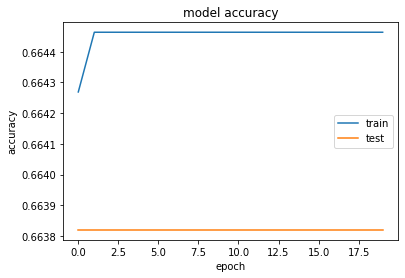

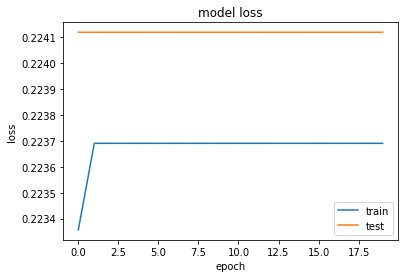

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00         0
      NORMAL       0.00      0.00      0.00         0
   PNEUMONIA       1.00      0.66      0.80      5144

    accuracy                           0.66      5144
   macro avg       0.33      0.22      0.27      5144
weighted avg       1.00      0.66      0.80      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00         0
      NORMAL       0.00      0.00      0.00         0
   PNEUMONIA       1.00      0.66      0.80      1288

    accuracy                           0.66      1288
   macro avg       0.33      0.22      0.27      1288
weighted avg       1.00      0.66      0.80      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<strong> as we can see,  the loss value is constant and the weights are not updated. the model only predicts for the PNEUMONIA class.</strong>

#II.

<strong>we use MSE for the data that has been generated from a normal distribution, unlike our data which is a classification problem and is classified into 3 categories. MSE loss function is mostly used in regressions, were we are going to predict the price of a house, height of a person, ... .</strong>

# 9

<strong>Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well<br>
regularization penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.<br></strong>

#II.

In [ ]:
dataTrain, dataTest = dataDefine(1)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(3, activation="softmax", kernel_regularizer=regularizers.l2(l2=0.0001))(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [ ]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 168s 1s/step - loss: 1.8209 - accuracy: 0.6828 - f1_m: 0.6791 - precision_m: 0.6861 - recall_m: 0.6735 - val_loss: 0.4232 - val_accuracy: 0.9030 - val_f1_m: 0.9040 - val_precision_m: 0.9064 - val_recall_m: 0.9017
Epoch 2/20
161/161 [==============================] - 167s 1s/step - loss: 0.4392 - accuracy: 0.8916 - f1_m: 0.8914 - precision_m: 0.8951 - recall_m: 0.8878 - val_loss: 0.5215 - val_accuracy: 0.8533 - val_f1_m: 0.8434 - val_precision_m: 0.8656 - val_recall_m: 0.8232
Epoch 3/20
161/161 [==============================] - 167s 1s/step - loss: 0.4279 - accuracy: 0.8864 - f1_m: 0.8858 - precision_m: 0.8900 - recall_m: 0.8818 - val_loss: 0.4223 - val_accuracy: 0.8828 - val_f1_m: 0.8840 - val_precision_m: 0.8903 - val_recall_m: 0.8780
Epoch 4/20
161/161 [==============================] - 167s 1s/step - loss: 0.4107 - accuracy: 0.8796 - f1_m: 0.8778 - precision_m: 0.8832 - recall_m: 0.8726 - val_loss: 0.2862 - val_accuracy: 0.9325 

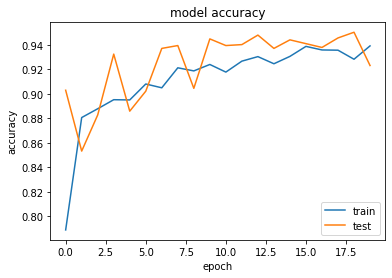

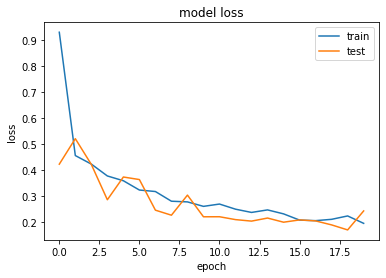

In [ ]:
draw(x)

In [ ]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.92      0.95      0.94       448
      NORMAL       0.96      0.82      0.89      1485
   PNEUMONIA       0.92      0.98      0.95      3211

    accuracy                           0.93      5144
   macro avg       0.94      0.92      0.93      5144
weighted avg       0.93      0.93      0.93      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.86      0.93      0.90       107
      NORMAL       0.97      0.80      0.88       381
   PNEUMONIA       0.92      0.98      0.95       800

    accuracy                           0.92      1288
   macro avg       0.91      0.91      0.91      1288
weighted avg       0.93      0.92      0.92      1288



<strong>
L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the  L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values. The two most common error functions used in neural network training are squared error and cross entropy error.<br>
In L2 regularization you add a fraction (often called the L2 regularization constant) of the sum of the squared weight values to the base error<br>On each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value

<strong>

#III.

<strong> is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.</strong>

In [ ]:
dataTrain, dataTest = dataDefine(1)

In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])

In [100]:
 x = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 169s 1s/step - loss: 2.5825 - accuracy: 0.6460 - f1_m: 0.6302 - precision_m: 0.6390 - recall_m: 0.6224 - val_loss: 0.2944 - val_accuracy: 0.8859 - val_f1_m: 0.8906 - val_precision_m: 0.9013 - val_recall_m: 0.8803
Epoch 2/20
161/161 [==============================] - 167s 1s/step - loss: 0.3514 - accuracy: 0.8623 - f1_m: 0.8620 - precision_m: 0.8676 - recall_m: 0.8568 - val_loss: 0.3102 - val_accuracy: 0.8835 - val_f1_m: 0.8815 - val_precision_m: 0.8843 - val_recall_m: 0.8788
Epoch 3/20
161/161 [==============================] - 168s 1s/step - loss: 0.3311 - accuracy: 0.8704 - f1_m: 0.8711 - precision_m: 0.8770 - recall_m: 0.8654 - val_loss: 0.1981 - val_accuracy: 0.9309 - val_f1_m: 0.9291 - val_precision_m: 0.9339 - val_recall_m: 0.9245
Epoch 4/20
161/161 [==============================] - 168s 1s/step - loss: 0.2814 - accuracy: 0.9050 - f1_m: 0.9041 - precision_m: 0.9086 - recall_m: 0.8997 - val_loss: 0.2009 - val_accuracy: 0.9262 

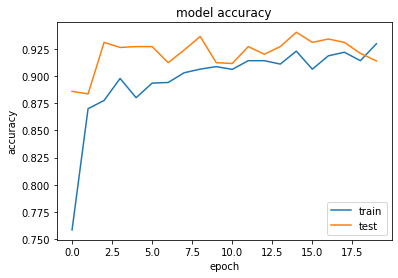

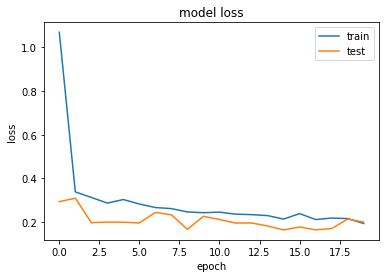

In [101]:
draw(x)

In [102]:
predict(model)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Train:
              precision    recall  f1-score   support

     COVID19       0.92      0.92      0.92       457
      NORMAL       0.70      0.98      0.81       899
   PNEUMONIA       0.99      0.89      0.94      3788

    accuracy                           0.91      5144
   macro avg       0.87      0.93      0.89      5144
weighted avg       0.93      0.91      0.92      5144

Test:
              precision    recall  f1-score   support

     COVID19       0.95      0.92      0.94       119
      NORMAL       0.72      0.96      0.82       237
   PNEUMONIA       0.98      0.90      0.94       932

    accuracy                           0.91      1288
   macro avg       0.88      0.93      0.90      1288
weighted avg       0.93      0.91      0.92      1288



<strong>At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections.So each iteration has a different set of nodes and this results in a different set of outputs.</strong>